# 손글씨 인식 모델
- 데이터 : Mnist data [http://yann.lecun.com/exdb/mnist/]
- 손글씨 이미지 6만장 훈련데이터, 1만장의 테스트 데이터로 구성

In [5]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os


print(tf.__version__)   # Tensorflow의 버전을 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

print(len(x_train))  # x_train 배열의 크기를 출력

print(x_train.shape, x_test.shape)

2.6.0
60000
(60000, 28, 28) (10000, 28, 28)


## 훈련 데이터, 라벨 데이터 확인
- 훈련 데이터 : 이미지
- 라벨 데이터 : 이미지의 값

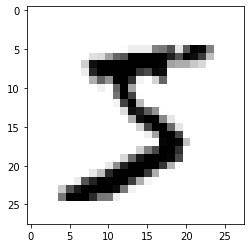

In [6]:
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [8]:
y_train[0]

5

## 데이터 전처리
- 데이터 정규화 : 손글씨 이미지 픽셀의 값을 0~1사이로 변경

In [9]:
x_train_norm, x_test_norm = x_train/255.0, x_test/255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


## 모델 설계

- 손글쓰 분류 모델 그대로 적용(LeNet 딥러닝 모델)

- Conv2D 레이어
 - 첫번째 인자 : 이미지의 특징(가위바위보 이미지 분류시 16개, 32개의 특징을 고려하겠다는 의미, 복잡한 이미지의 경우 특징수를 늘리는것이 좋다)
 - 마지막 인자 : 입력 이미지 형태(가로, 세로, 채널수)
    ```
    model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224,224,1)))
    model.add(keras.layers.Conv2D(32, (3,3), activation='relu')) 
    ```
- MaxPool2D 레이어
- Dense 레이어 
 - 첫번째 인자 : 분류기에 사용되는 뉴런의 수 (복잡한 분류가 필요한 경우 뉴런수를 늘리는 것이 좋다)
 - 마지막 Dense레이어의 경우 출력단에서 결과적으로 분류할 클래스 수로 지정해야한다.
```
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax')) #가위바위보 : 3

 ```



In [10]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

## 모델 학습
- train data를 Conv2D 레이어의 입력 데이터 shape 으로 변경
 - shape :데이터갯수, 이미지 크기 x, 이미지 크기 y, 채널수
 - 채널수 1 : 흑백이미지, 채널수 3: RGB 컬러 이미지

In [13]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [14]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 21s 3ms/step - loss: 0.2116 - accuracy: 0.9354
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0724 - accuracy: 0.9776
Epoch 3/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0531 - accuracy: 0.9834
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0437 - accuracy: 0.9864
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0349 - accuracy: 0.9886
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0299 - accuracy: 0.9901
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0248 - accuracy: 0.9916
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0211 - accuracy: 0.9930
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0182 - accuracy: 0.9940
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.01

# 모델 테스트

In [17]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=1)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.0425 - accuracy: 0.9891
test_loss: 0.04245106875896454 
test_accuracy: 0.9890999794006348


In [18]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [1.2361545e-09 3.0604067e-08 1.5744499e-07 1.1494632e-06 2.1095216e-10
 3.0689906e-10 3.3662249e-18 9.9999869e-01 3.5769165e-10 3.4706147e-08]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


### 모델이 예측한 값 확인 - 예측이 바른경우
 - test[0] 이미지의 실제 라벨 : 7 
 - predicted_result에서 7의 추론 확률이 9.9999869e-01 으로 가장 높은것을 알수 있다
 - 이미지로 확인해보자

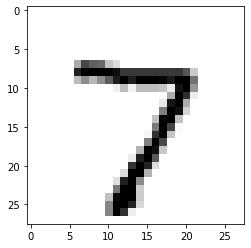

In [21]:
plt.imshow(x_test[0], cmap=plt.cm.binary)

### 모델이 예측한 값 확인 - 예측이 틀린 경우

예측확률분포: [3.5155107e-10 2.9505909e-08 6.1408008e-07 1.8703476e-08 1.3931753e-01
 9.0467875e-06 3.4916792e-11 5.6379122e-01 1.8680732e-04 2.9669476e-01]
라벨: 9, 예측결과: 7


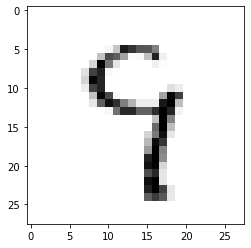

예측확률분포: [7.3040859e-04 3.4541443e-09 1.1042594e-09 2.3904413e-08 3.0835700e-08
 2.8265014e-04 9.9898309e-01 2.4206413e-11 3.6360273e-06 1.0839420e-10]
라벨: 5, 예측결과: 6


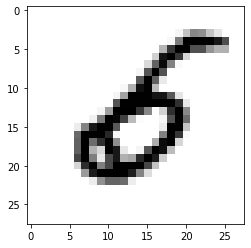

예측확률분포: [9.9763858e-01 1.6427629e-10 7.7544519e-06 4.0516060e-08 5.5173471e-13
 2.5727884e-09 3.5988064e-06 2.5232534e-08 2.3447066e-03 5.3335275e-06]
라벨: 8, 예측결과: 0


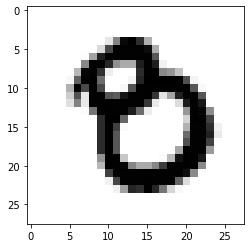

예측확률분포: [4.3689979e-06 5.2010719e-02 8.3531916e-02 9.0959731e-12 7.9534501e-01
 6.1759085e-05 4.7195822e-06 6.8464264e-02 5.7707418e-04 2.5466829e-07]
라벨: 2, 예측결과: 4


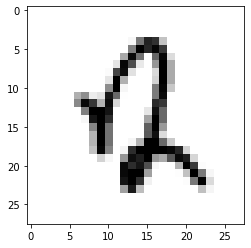

예측확률분포: [3.11872874e-08 1.89785752e-07 9.48481975e-05 3.90385836e-03
 4.71366693e-05 3.98440216e-06 3.57351545e-14 1.02045365e-01
 3.02262485e-01 5.91642082e-01]
라벨: 8, 예측결과: 9


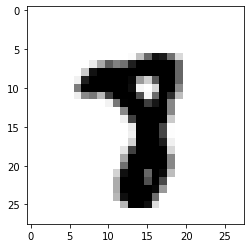

In [25]:
import random
wrong_predict_list = []
#예측 결과중 가능성이 높은 결과
for i, _ in enumerate(predicted_labels):    
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if y_test[i] != predicted_labels[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

## 모델 개선

In [26]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25632     
_________________________________________________________________
dropout (Dropout)            (None, 32)               